<a href="https://colab.research.google.com/github/annlitapaulson/PRODIGY_DS_02/blob/main/%22PRODIGY_DS_02%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')
gender_submission_df = pd.read_csv('/content/gender_submission.csv')

In [ ]:
print("Train Dataset Preview:")
print(train_df.head())
print("\nData Summary:")
train_df.info()

Train Dataset Preview:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0

In [ ]:
print("\nBasic Statistics:")
print(train_df.describe(include='all'))
print("\nMissing Values:")
missing_values = train_df.isnull().sum()
print(missing_values)
median_age = train_df['Age'].median()


Basic Statistics:
        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parch  

In [ ]:
print(f"\nFilling missing Age values with median: {median_age}")
train_df['Age'].fillna(median_age, inplace=True)


Filling missing Age values with median: 28.0


In [ ]:
print("\nDropping Cabin column")
train_df.drop(columns=['Cabin'], inplace=True)
mode_embarked = train_df['Embarked'].mode()[0]


Dropping Cabin column


In [ ]:
print(f"\nFilling missing Embarked values with mode: {mode_embarked}")
train_df['Embarked'].fillna(mode_embarked, inplace=True)


Filling missing Embarked values with mode: S


In [ ]:
print("\nMissing Values After Cleaning:")
print(train_df.isnull().sum())


Missing Values After Cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [ ]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
train_df['IsAlone'] = (train_df['FamilySize'] == 1).astype(int)
train_df['Title'] = train_df['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())
title_mapping = {
    "Mr": "Mr", "Miss": "Miss", "Mrs": "Mrs", "Master": "Master",
    "Dr": "Rare", "Rev": "Rare", "Col": "Rare", "Major": "Rare",
    "Mlle": "Miss", "Countess": "Rare", "Ms": "Mrs", "Lady": "Rare",
    "Jonkheer": "Rare", "Don": "Rare", "Mme": "Mrs", "Capt": "Rare",
    "Sir": "Rare"
}

In [ ]:
train_df['Title'] = train_df['Title'].map(title_mapping)
train_df['Title'].fillna('Rare', inplace=True)
print("\nModified DataFrame with New Features:")
print(train_df.head())


Modified DataFrame with New Features:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  FamilySize  IsAlone Title  
0      0         A/5 21171   7.2500        S           2        0    Mr  
1      0          PC 17599  71.2833        C           2        0   Mrs  
2      0  STON/O2. 3101282   7.9250        S           1   

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
print("\nSurvival Rate by Sex:")
print(train_df[['Sex', 'Survived']].groupby('Sex').mean())


Survival Rate by Sex:
        Survived
Sex             
female  0.742038
male    0.188908


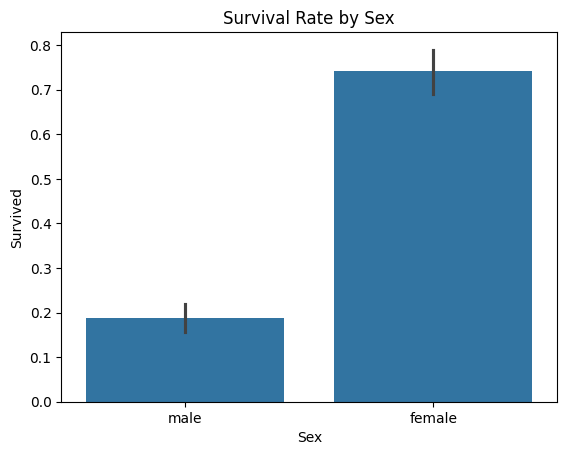


Survival Rate by Pclass:
        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


In [ ]:
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title('Survival Rate by Sex')
plt.show()
print("\nSurvival Rate by Pclass:")
print(train_df[['Pclass', 'Survived']].groupby('Pclass').mean())

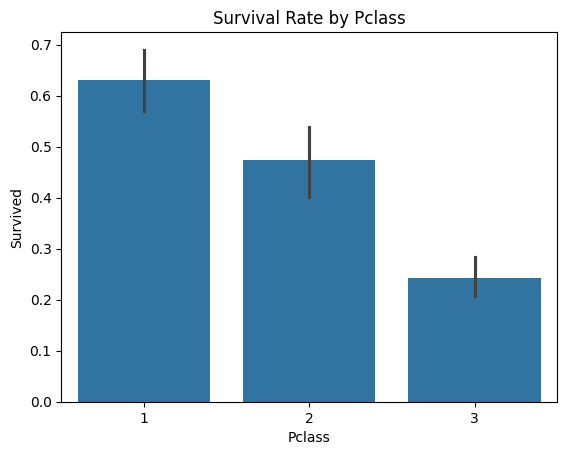


Survival Rate by FamilySize:
            Survived
FamilySize          
1           0.303538
2           0.552795
3           0.578431
4           0.724138
5           0.200000
6           0.136364
7           0.333333
8           0.000000
11          0.000000


In [ ]:
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title('Survival Rate by Pclass')
plt.show()
print("\nSurvival Rate by FamilySize:")
print(train_df[['FamilySize', 'Survived']].groupby('FamilySize').mean())

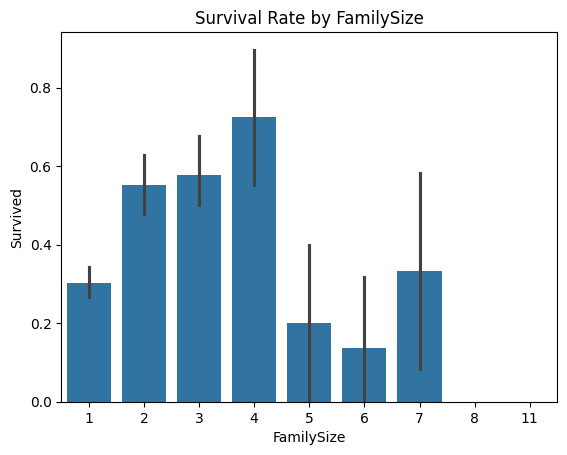


Survival Rate by Embarked:
          Survived
Embarked          
C         0.553571
Q         0.389610
S         0.339009


In [ ]:
sns.barplot(x='FamilySize', y='Survived', data=train_df)
plt.title('Survival Rate by FamilySize')
plt.show()
print("\nSurvival Rate by Embarked:")
print(train_df[['Embarked', 'Survived']].groupby('Embarked').mean())

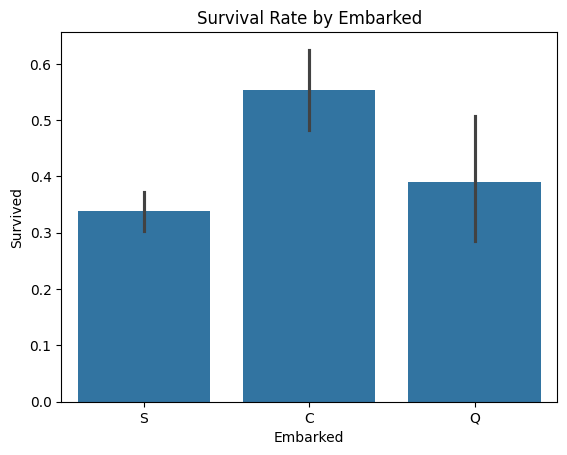

In [ ]:
sns.barplot(x='Embarked', y='Survived', data=train_df)
plt.title('Survival Rate by Embarked')
plt.show()